In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8981 - loss: 0.3200 - val_accuracy: 0.9840 - val_loss: 0.0528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 0.9863 - val_loss: 0.0397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9892 - val_loss: 0.0320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9927 - loss: 0.0217 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9903 - val_loss: 0.0308
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9895 - val_loss: 0.0362
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9910 - val_loss: 0.0311
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9974 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0494
Test Loss: 0.0431
Test Accuracy: 0.9905
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


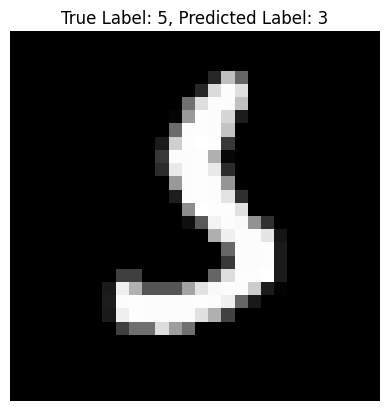

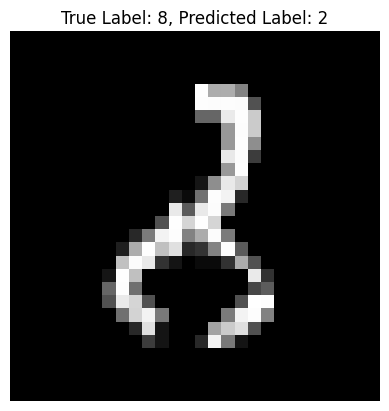

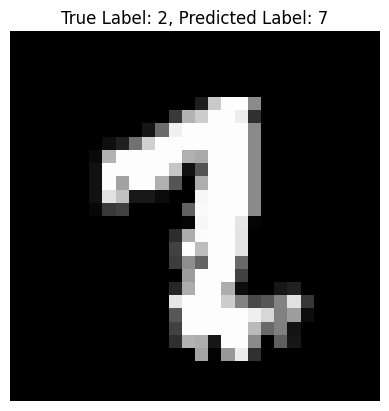

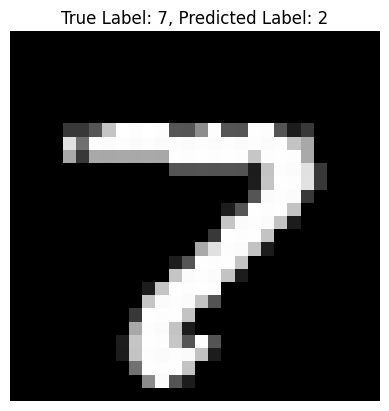

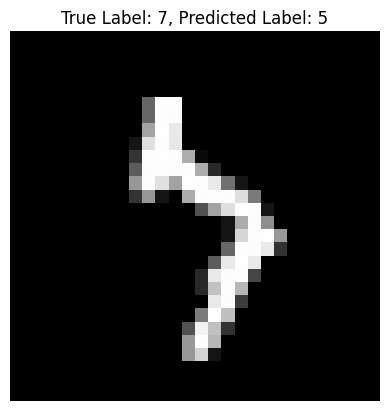

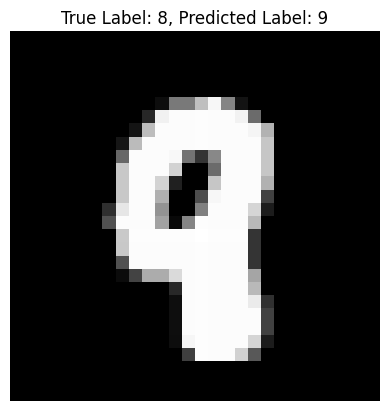

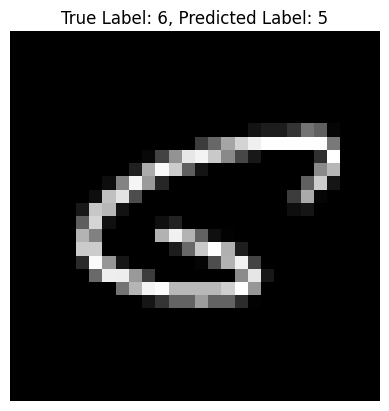

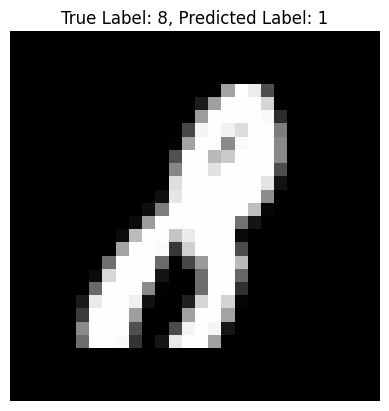

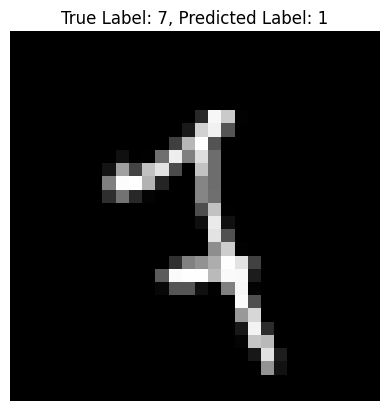

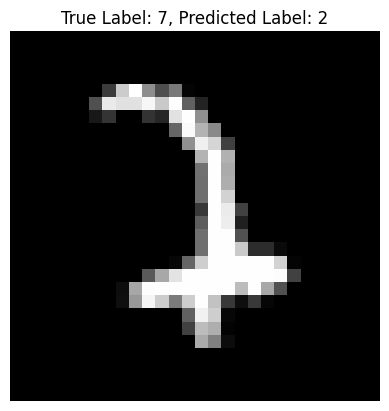

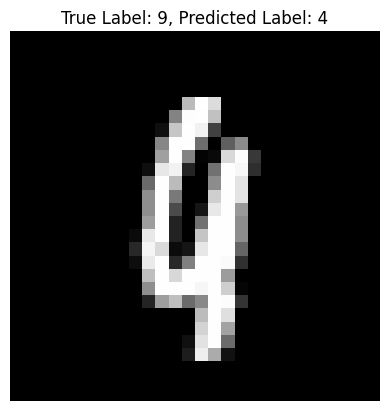

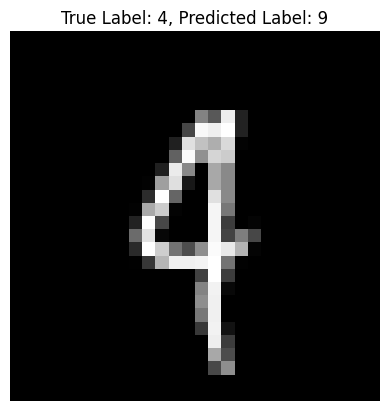

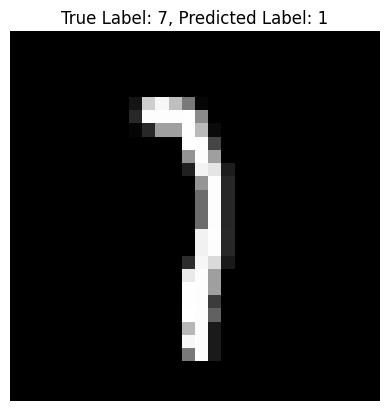

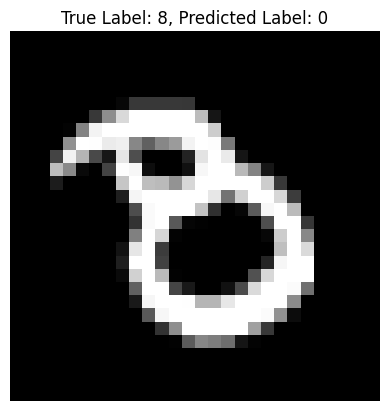

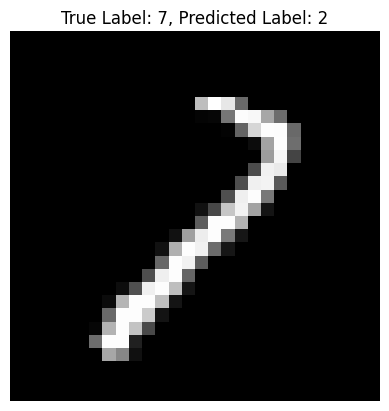

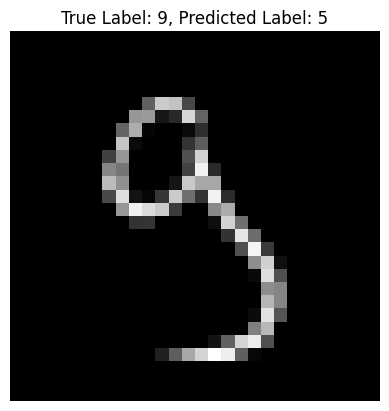

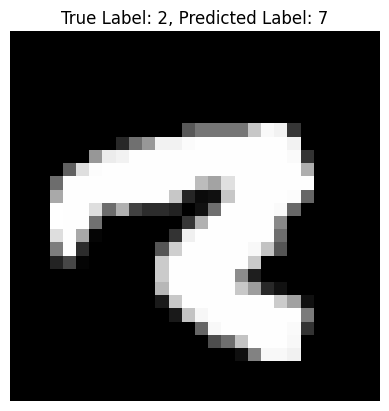

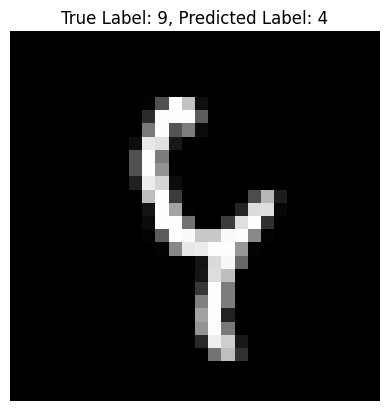

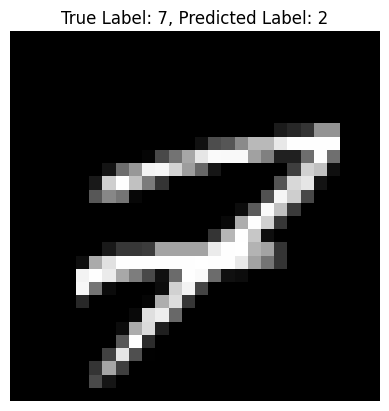

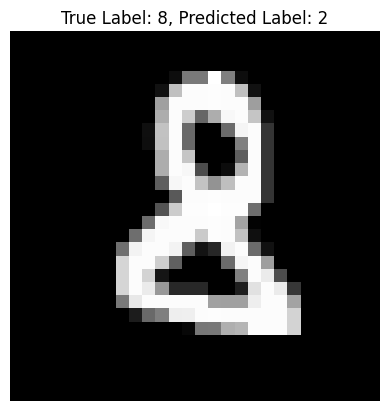

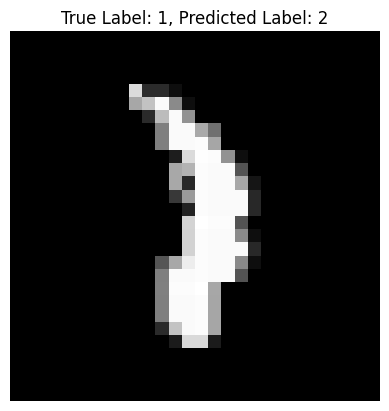

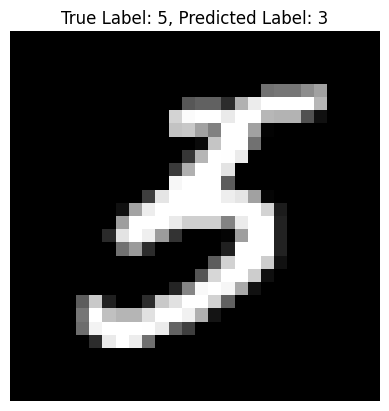

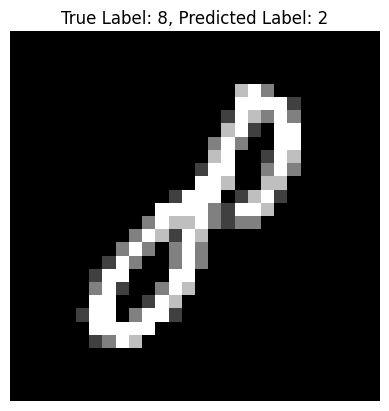

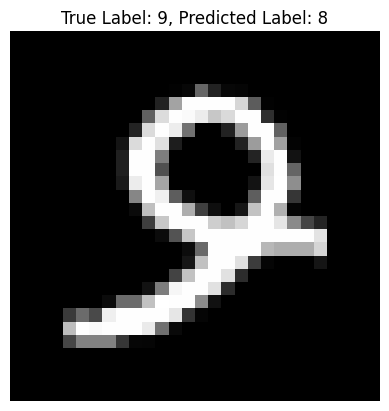

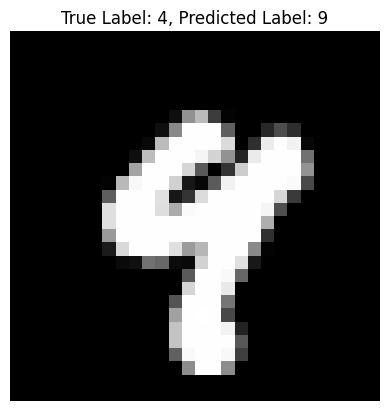

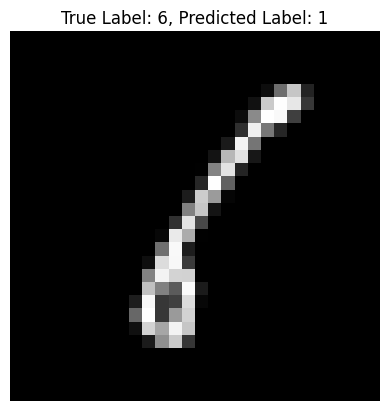

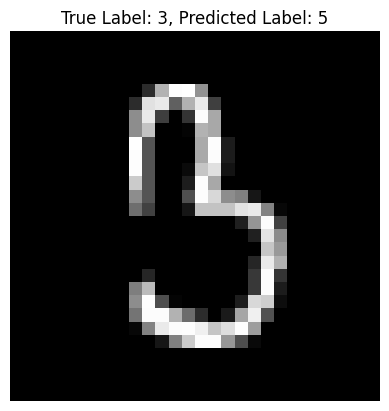

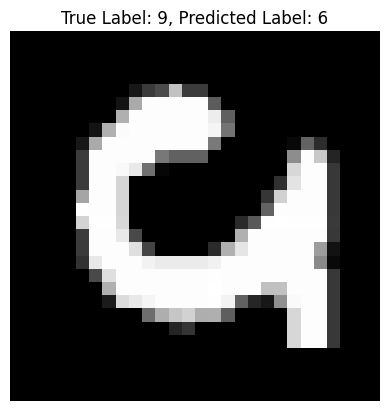

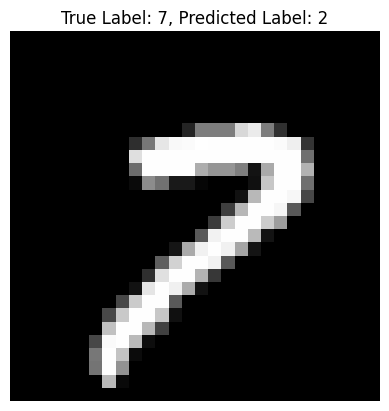

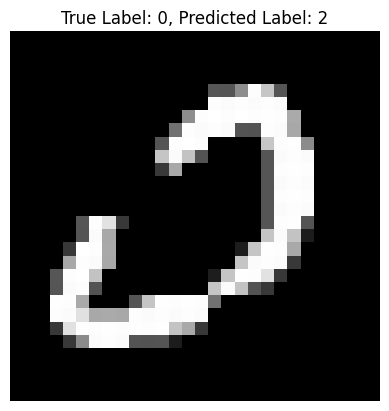

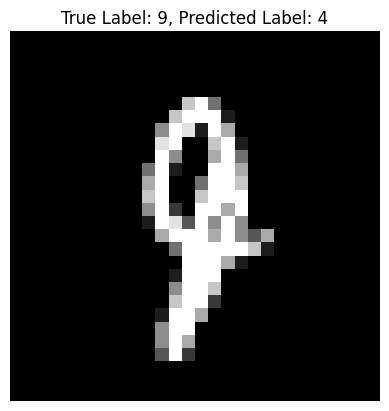

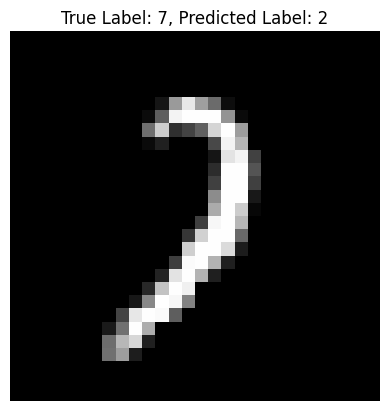

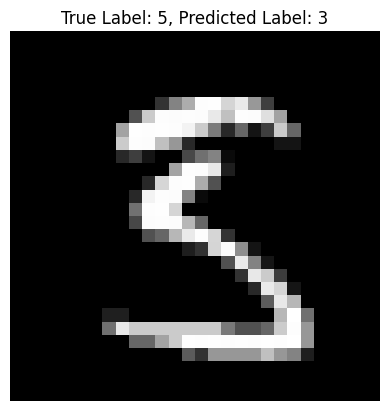

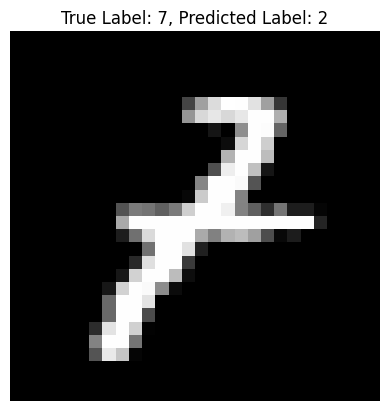

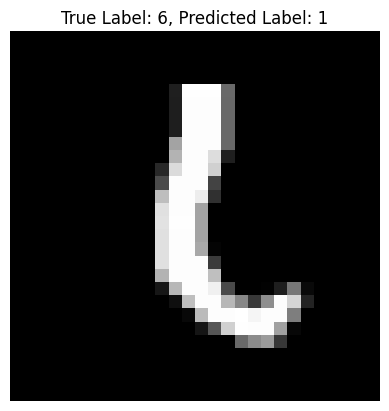

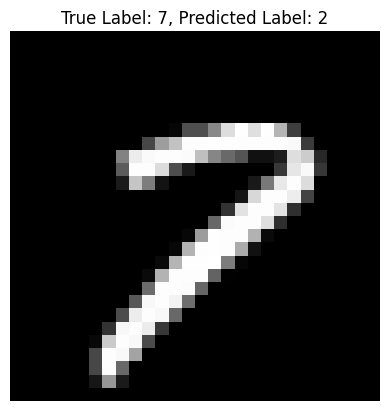

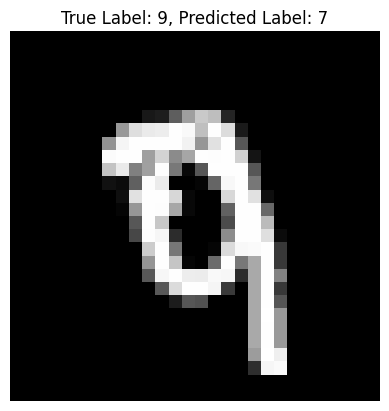

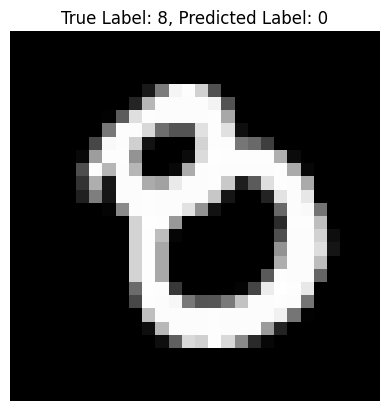

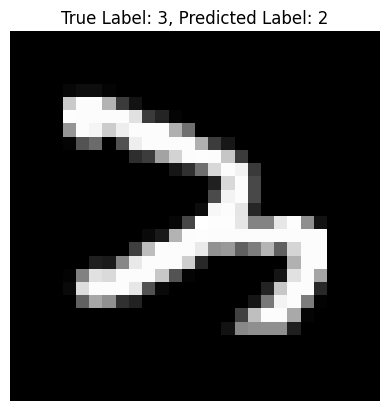

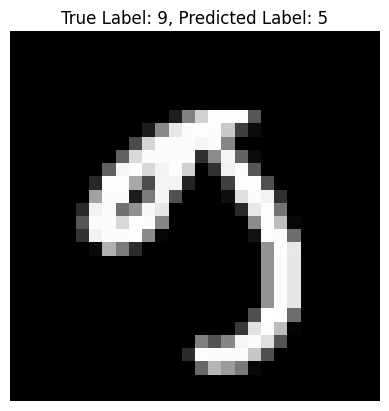

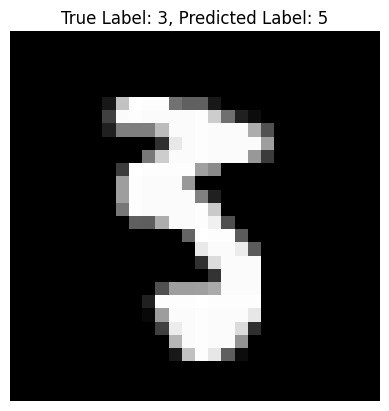

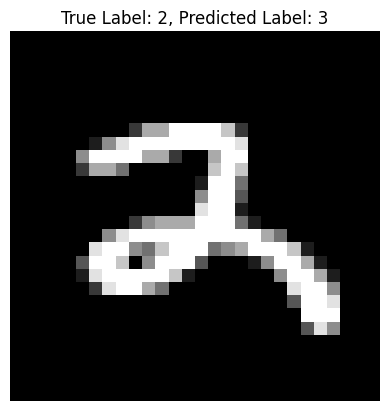

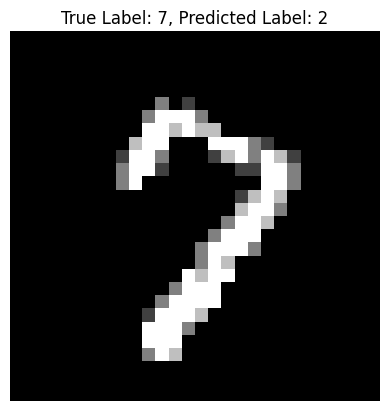

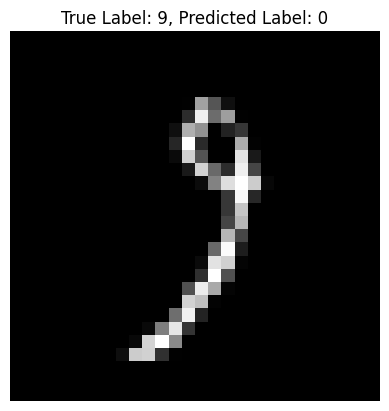

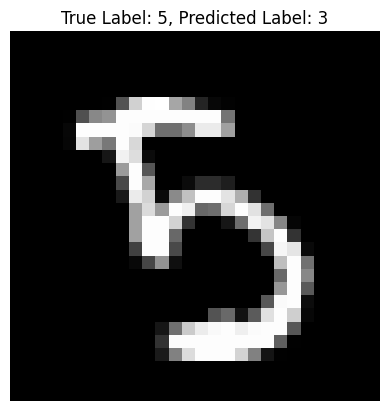

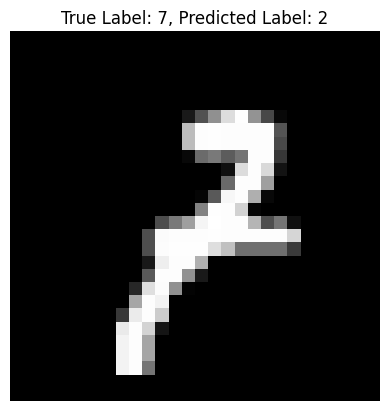

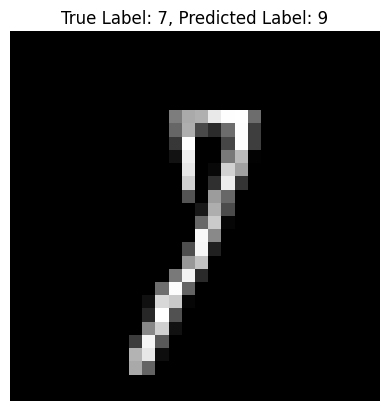

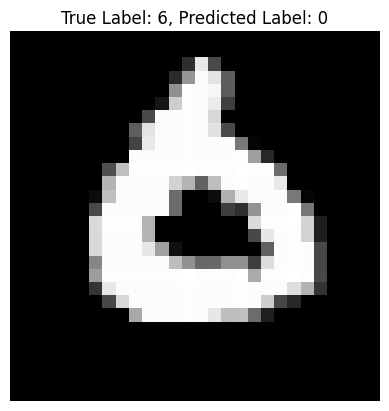

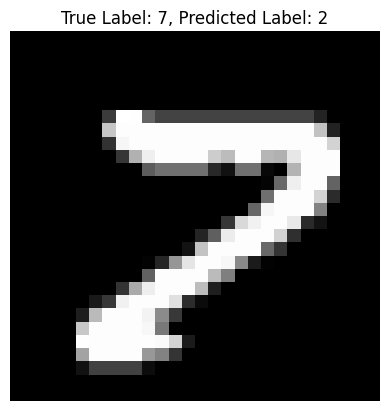

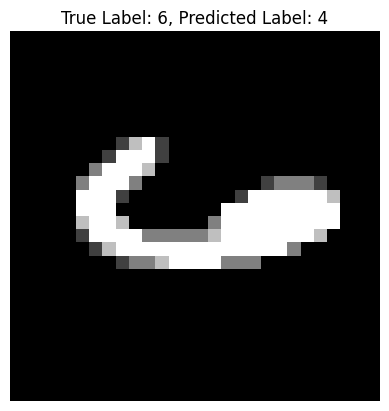

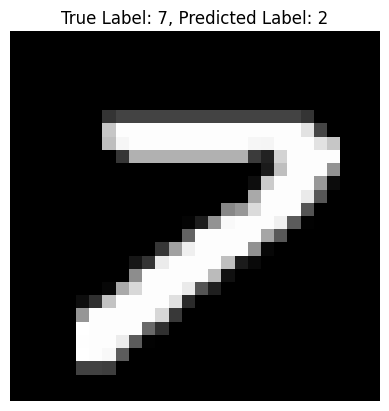

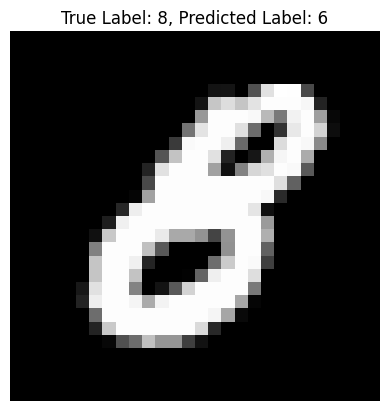

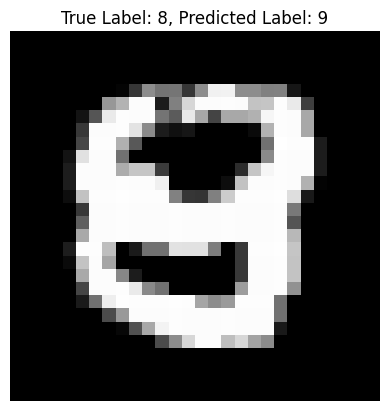

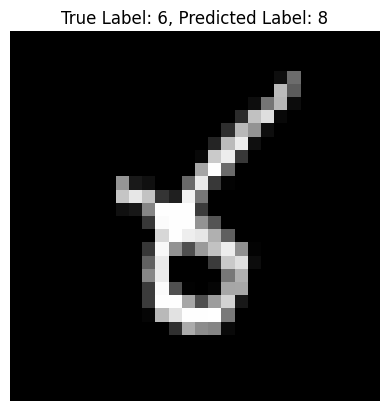

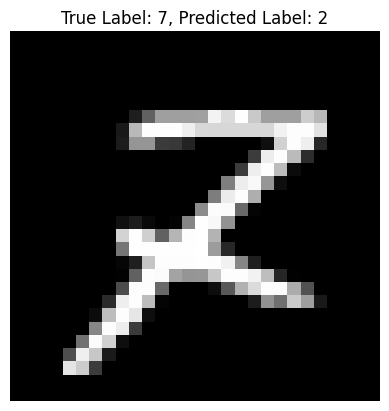

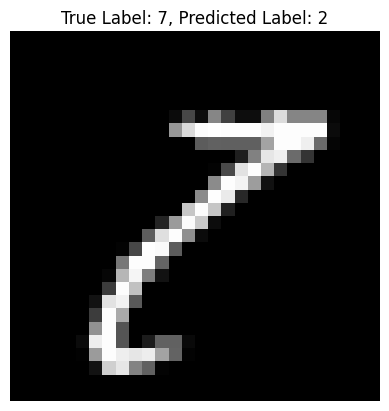

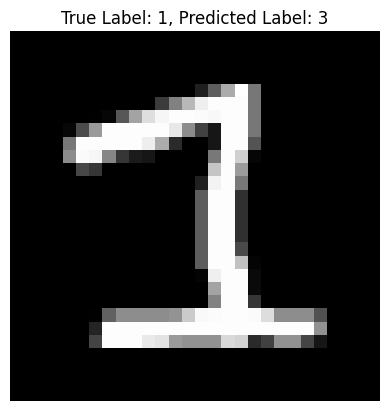

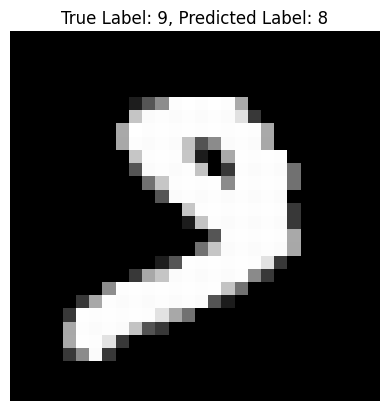

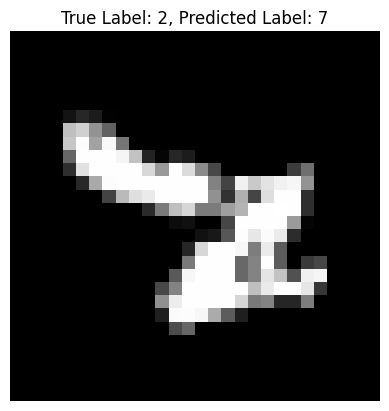

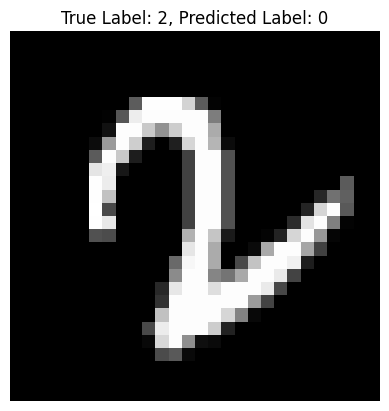

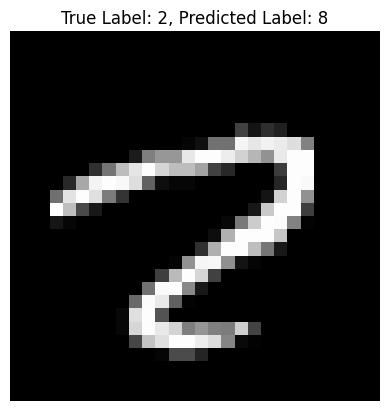

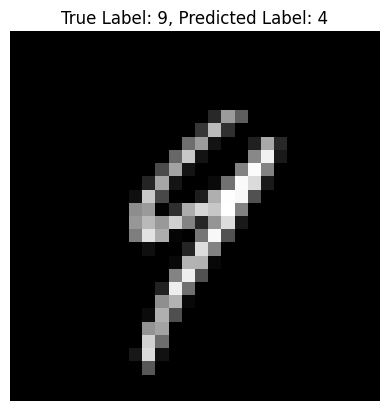

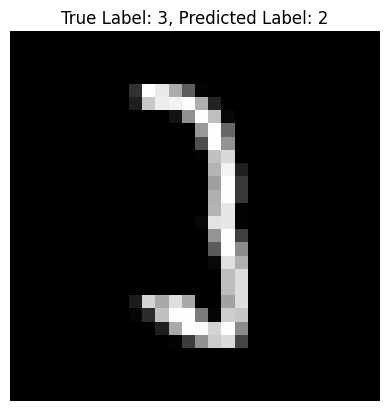

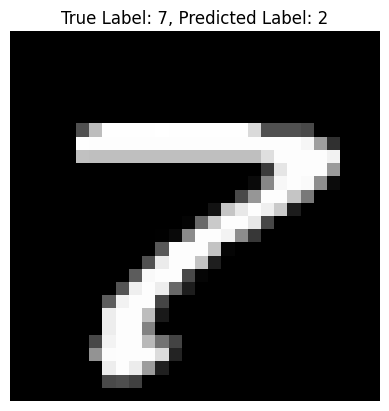

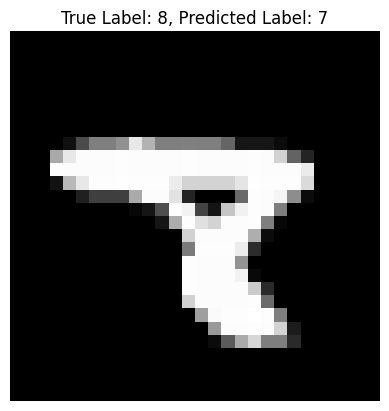

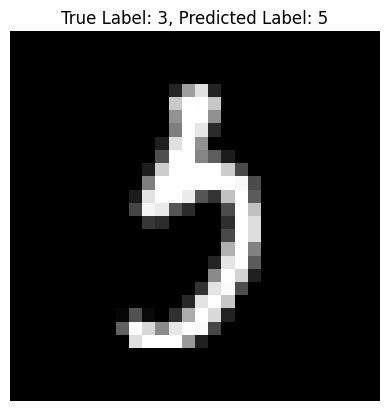

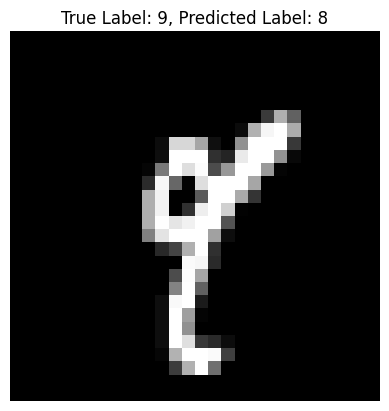

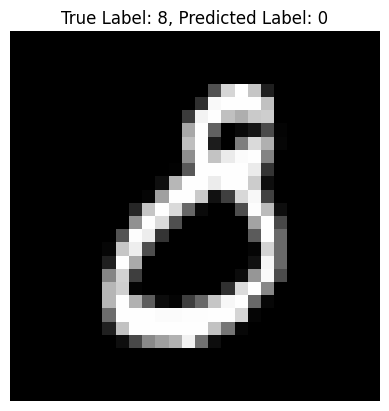

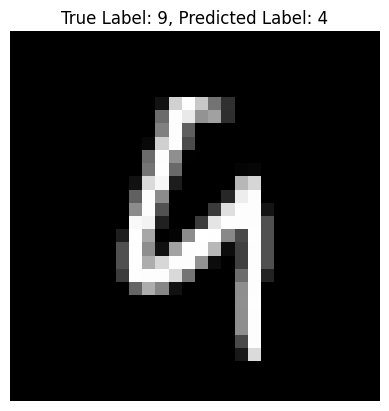

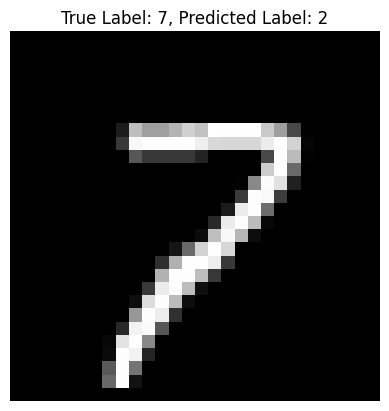

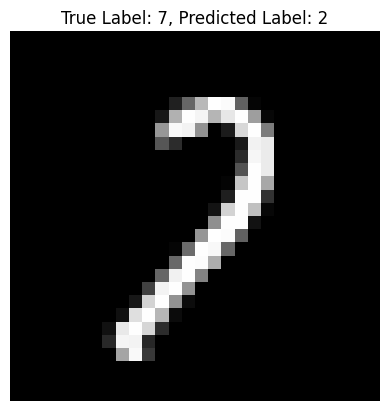

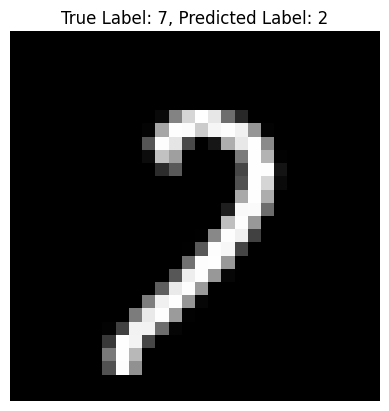

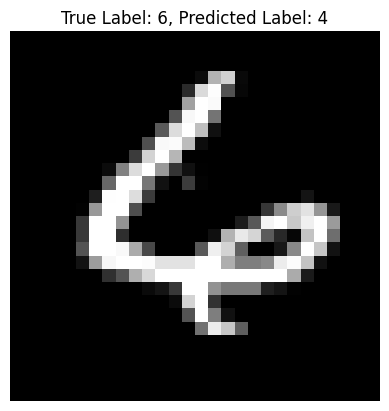

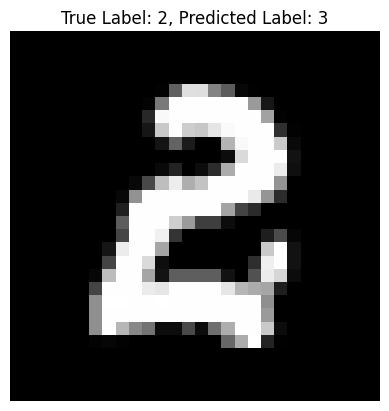

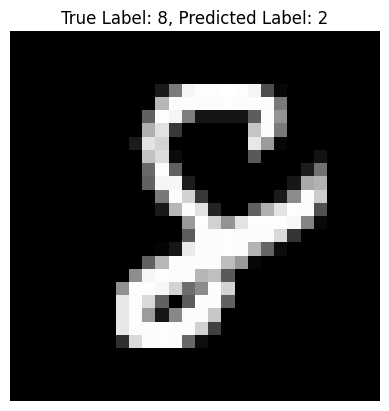

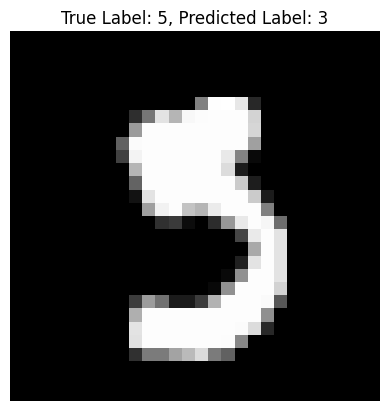

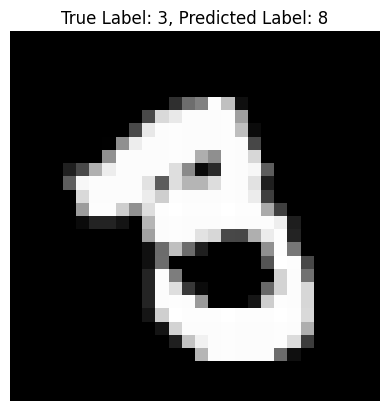

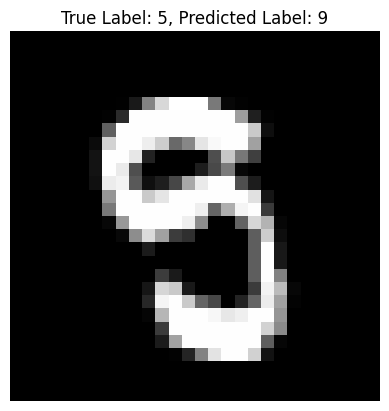

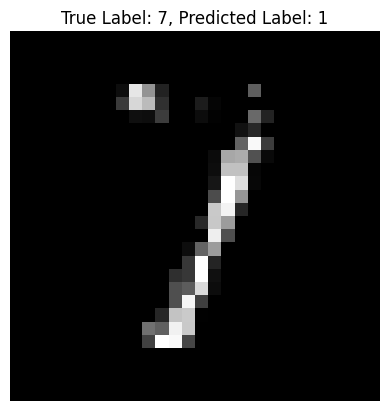

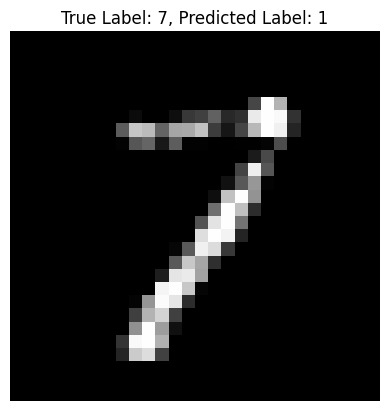

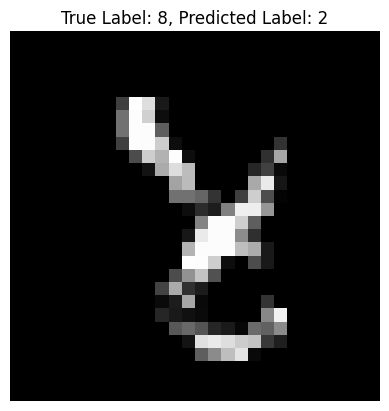

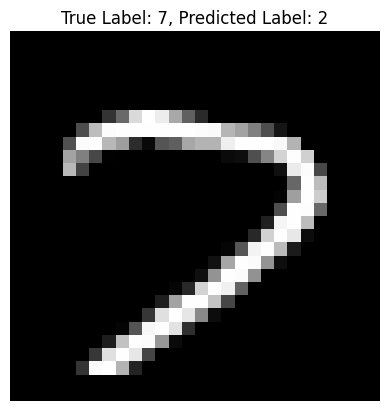

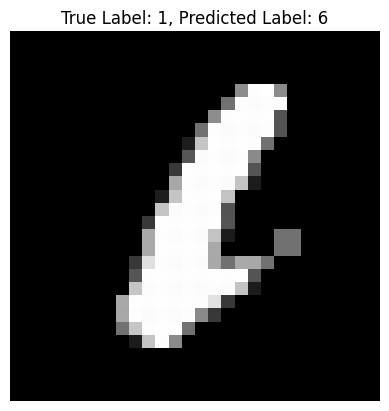

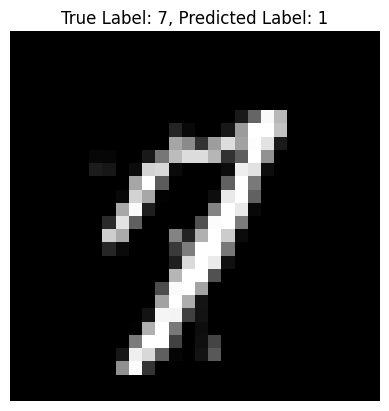

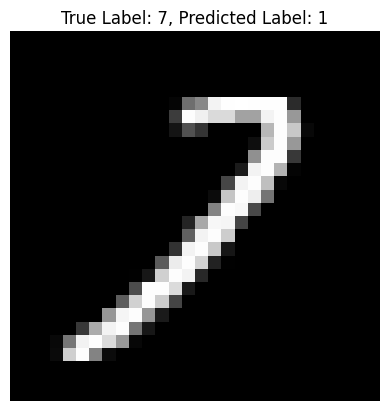

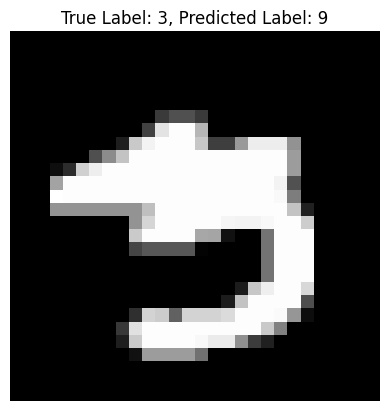

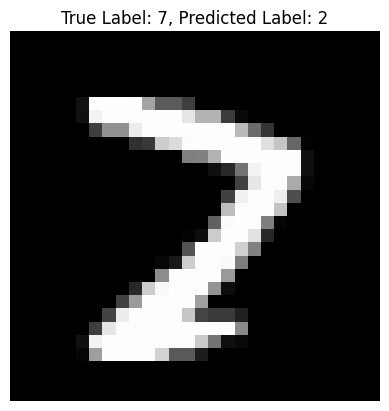

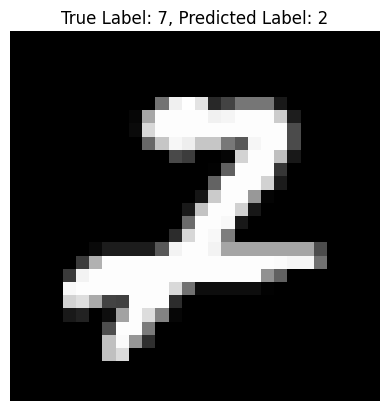

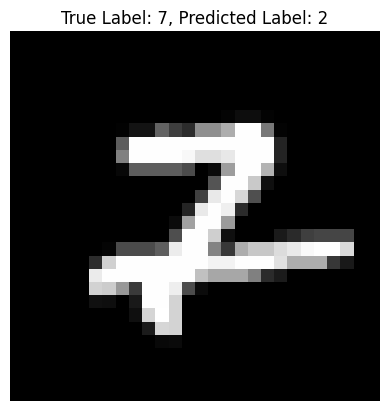

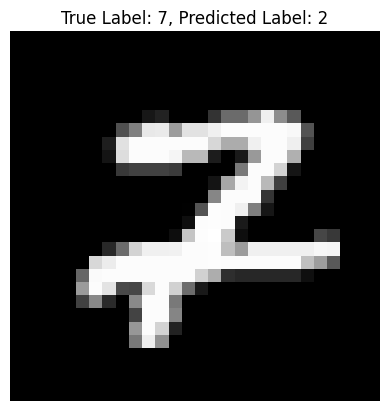

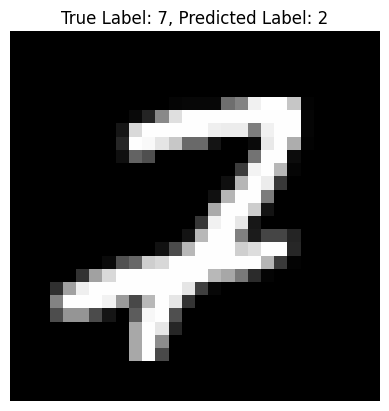

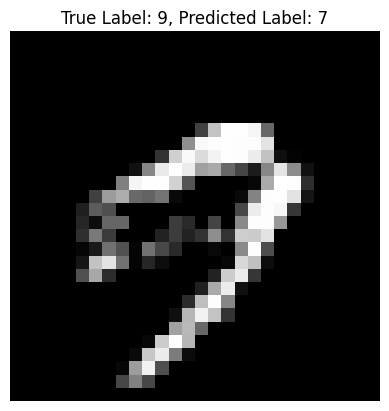

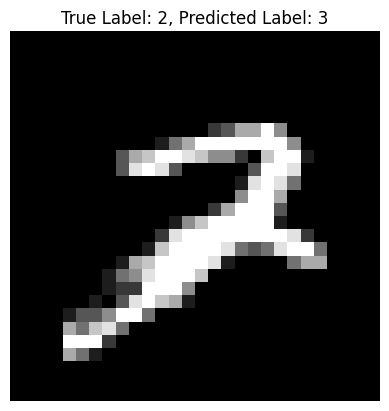

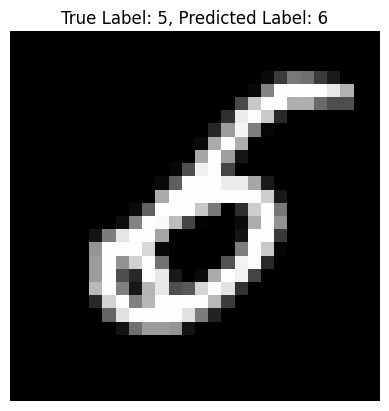

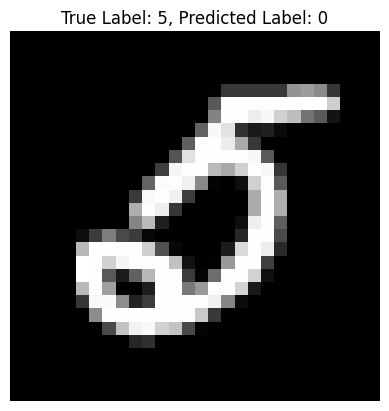

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the labels for the test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Find the misclassified digits
misclassified_indices = np.where(y_pred_labels != y_test)[0]

# Print images of misclassified digits with the model prediction
for index in misclassified_indices:
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[index]}, Predicted Label: {y_pred_labels[index]}")
    plt.axis('off')
    plt.show()